# [MDB] Machine Learning Coding Demo

> **Author(s)**: Amol Budhiraja (abudhiraja@berkeley.edu)

This notebook aims to provide an introduction to machine learning and computer vision basics for new members at Mobile Developers of Berkeley (MDB: https://mdb.dev/). It provides a very basic introduction to some core components and is used as a lecture aid during classroom sessions.



# Setup and Importing Necessary Files

First, we want to install the important libraries and dependencies that we will use in our exploration!

In [ ]:
!pip install transformers diffusers

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
from diffusers import StableDiffusionPipeline

To ensure that we are getting consistent results each time, we set the random seeds for both numpy and torch. This is an OPTIONAL step.

In [ ]:
# Set random seeds for reproducibility
np.random.seed(0)
torch.manual_seed(0)

print("Notebook successfully setup!")

Notebook successfully setup!


As we discussed in class, there are three problems in Machine Learning:

1. Regression
2. Classification
3. Generation

In this notebook we will explore all three of these problems.


---



# Regression

In machine learning, **regression** is a type of supervised learning used to predict continuous values, such as predicting house prices, stock prices, or temperatures.
In this lesson, we’ll cover:
- Linear regression
- Mean squared error (MSE) as a loss function
- Training a model to minimize the loss using gradient descent

Let's get started!

First, we are going to generate some sample data points...

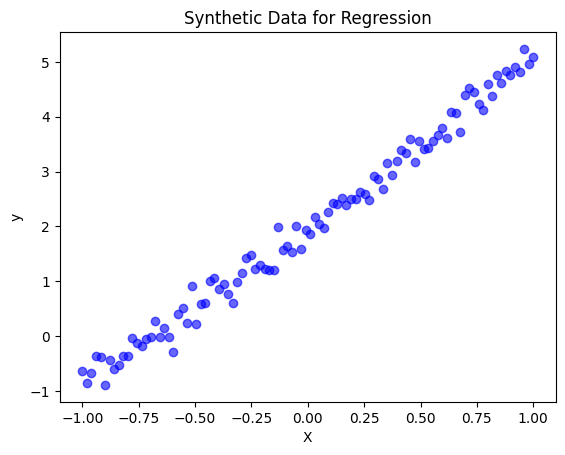

In [ ]:
def generate_data(n_samples=100):
    X = np.linspace(-1, 1, n_samples)
    y = 3 * X + 2 + 0.2 * np.random.randn(n_samples)
    return X, y

X, y = generate_data()
plt.scatter(X, y, color='blue', alpha=0.6)
plt.title("Synthetic Data for Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In this demo we will be using PyTorch, which is a popular Machine Learning library that was created by Facebook and is used in research and throughout industry! We will convert these data values to tensors.

In [ ]:
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)
print("Data prepared for PyTorch!")

Data prepared for PyTorch!


## Aside: Introduction to Tensors

In machine learning, **tensors** are a fundamental data structure, especially in frameworks like PyTorch. They allow efficient computation and are versatile in representing data across multiple dimensions.

### What is a Tensor?

A tensor is a multidimensional array:
- **Scalar**: 0-dimensional tensor (e.g., a single number).
- **Vector**: 1D tensor (e.g., [3, 5, 7]).
- **Matrix**: 2D tensor (e.g., a table of numbers).
- **n-D Tensor**: Tensors can extend to higher dimensions (e.g., 3D tensors for images, 4D for videos).

### Tensors in PyTorch


In PyTorch, tensors work similarly to NumPy arrays but offer:
1. **Multi-Dimensional Storage**: Ideal for complex data like images and videos.
2. **Optimized Computation**: Supports CPU and GPU calculations.
3. **Automatic Differentiation**: Enables gradient calculations for model training.


Tensors allow models to process and learn from data efficiently. In deep learning, input data (tensors) pass through models to produce outputs, using operations like matrix multiplication—optimized through tensors.


In [ ]:
scalar = torch.tensor(42)
vector = torch.tensor([1.0, 2.0, 3.0])
matrix = torch.tensor([[1.0, 2.0], [3.0, 4.0]])

print("Scalar (0D Tensor): ", scalar)
print("Vector (1D Tensor): ", vector)
print("Matrix (2D Tensor): ", matrix)

Scalar (0D Tensor):  tensor(42)
Vector (1D Tensor):  tensor([1., 2., 3.])
Matrix (2D Tensor):  tensor([[1., 2.],
        [3., 4.]])


## Solving Linear Regression with Least Squares

In this example, we’ll solve a linear regression problem using the **least squares method** in NumPy. The least squares approach provides a direct way to find the optimal parameters without iterative training.

### Theory: Least Squares Solution

In a linear regression model, we aim to find a line that best fits the data points. This line has the equation:

$
y = W \cdot X + b
$

where:
- \( y \) represents the target values.
- \( X \) is the input data.
- \( W \) is the weight (slope).
- \( b \) is the bias (intercept).

### Matrix Formulation

To find \( W \) and \( b \), we can represent the model in matrix form:

$
y = X \cdot \theta
$

where:
- \( y \) is a vector of outputs.
- \( X \) is a matrix of inputs (with an additional column of ones for the bias term).
- $ ( \theta ) $ is a vector of parameters \([W, b]\).

### The Least Squares Formula

Using linear algebra, the least squares solution for \(\theta\) is:

$
\theta = (X^T X)^{-1} X^T y
$

This formula provides the exact values for \( W \) and \( b \) that minimize the mean squared error between the predictions and the true values.


In [ ]:
X_b = np.c_[X, np.ones(X.shape[0])]
theta_best = ... # TODO: Apply the least squares formula.
W, b = theta_best
print(f"Optimal parameters: W = {W:.4f}, b = {b:.4f}")

y_pred = W * X + b

Optimal parameters: W = 2.9703, b = 2.0120


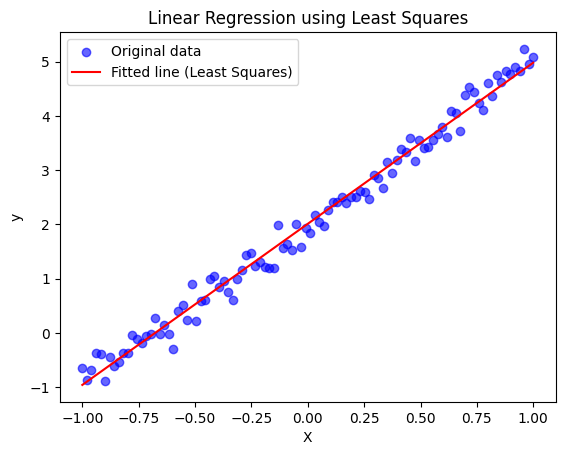

In [ ]:
plt.scatter(X, y, color='blue', alpha=0.6, label="Original data")
plt.plot(X, y_pred, color='red', label="Fitted line (Least Squares)")
plt.title("Linear Regression using Least Squares")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Multilayer Perceptron (MLP) Example with PyTorch

In this example, we’ll implement a basic MLP for a regression task using PyTorch. An MLP is a type of feedforward neural network with one or more hidden layers. It can learn complex, non-linear relationships in data, making it a powerful tool for a wide range of machine learning tasks.

### Step 1: Generating Synthethic Data

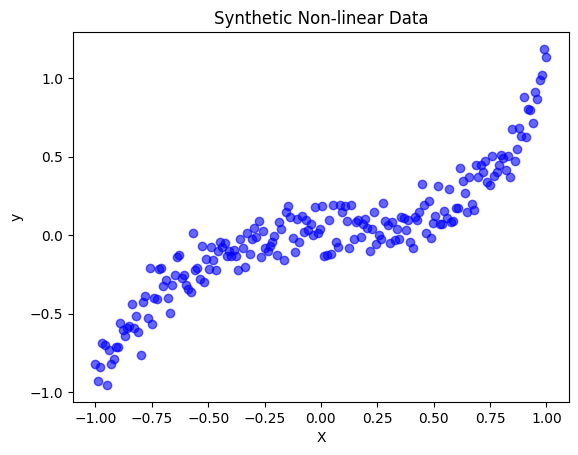

In [ ]:
# Generate synthetic non-linear data
np.random.seed(0)
X = np.linspace(-1, 1, 200)
y = X ** 3 + 0.1 * np.random.randn(200)  # non-linear relationship with some noise

# Convert data to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32).view(-1, 1)  # reshaped to (200, 1)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)

# Plot the data
plt.scatter(X, y, color='blue', alpha=0.6)
plt.title("Synthetic Non-linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

### Step 2: Defining the MLP Model

In [ ]:
# Define the MLP model
class MLP(nn.Module):
    def __init__(self):
        # TODO: Define the MLP Model

    def forward(self, x):
        # TODO: Define the forward pass of the MLP Model
        return x

model = MLP()
print(model)

MLP(
  (hidden1): Linear(in_features=1, out_features=64, bias=True)
  (hidden2): Linear(in_features=64, out_features=32, bias=True)
  (output): Linear(in_features=32, out_features=1, bias=True)
)


### Step 3: Setting up Loss Function and Optimizer

In [ ]:
criterion = # TODO: Define the criterion.
optimizer = # TODO: Define the optimizer.

print("Loss function and optimizer initialized.")

Loss function and optimizer initialized.


### Step 4: Training the Model

In [ ]:

# Training loop with tqdm progress bar
epochs = 1000
losses = []

# Use tqdm to wrap the range of epochs
for epoch in tqdm(range(epochs), desc="Training Progress"):
    # TODO: Define the forward and backward passes of the training loop.

    # Print loss every 100 epochs for reference
    if (epoch + 1) % 100 == 0:
        print(f"Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4f}")

print("Training complete!")

Training Progress:  15%|█▌        | 153/1000 [00:00<00:02, 357.09it/s]

Epoch [100/1000], Loss: 0.0442


Training Progress:  31%|███       | 310/1000 [00:00<00:01, 487.94it/s]

Epoch [200/1000], Loss: 0.0329
Epoch [300/1000], Loss: 0.0312


Training Progress:  51%|█████     | 508/1000 [00:01<00:00, 580.07it/s]

Epoch [400/1000], Loss: 0.0292
Epoch [500/1000], Loss: 0.0275


Training Progress:  70%|███████   | 705/1000 [00:01<00:00, 584.67it/s]

Epoch [600/1000], Loss: 0.0264
Epoch [700/1000], Loss: 0.0256


Training Progress:  87%|████████▋ | 872/1000 [00:01<00:00, 451.60it/s]

Epoch [800/1000], Loss: 0.0248


Training Progress: 100%|██████████| 1000/1000 [00:02<00:00, 493.28it/s]

Epoch [900/1000], Loss: 0.0241
Epoch [1000/1000], Loss: 0.0233
Training complete!


### Step 5: Plotting the training loss

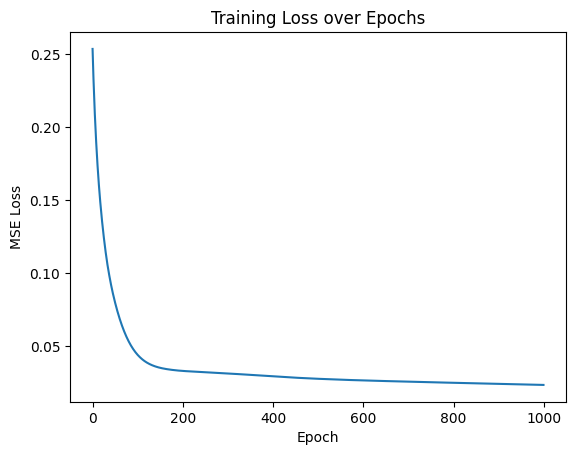

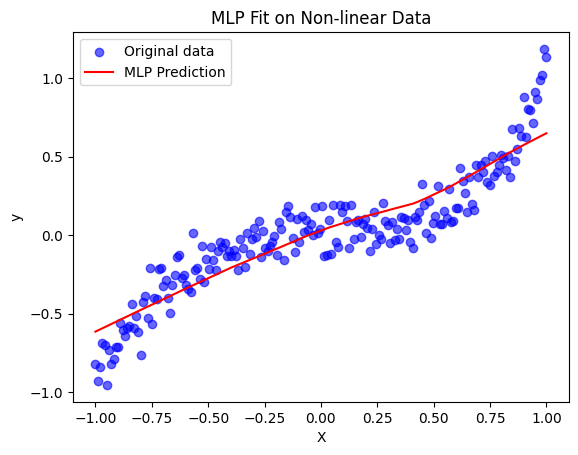

In [ ]:
plt.plot(losses)
plt.title("Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

with torch.no_grad():
    y_pred = model(X_tensor).numpy()

plt.scatter(X, y, color='blue', alpha=0.6, label="Original data")
plt.plot(X, y_pred, color='red', label="MLP Prediction")
plt.title("MLP Fit on Non-linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Classification

**Classification** is a type of supervised learning where the goal is to categorize input data into predefined classes or labels. It’s widely used in tasks such as image recognition, spam detection, and medical diagnosis.

In classification, a model learns patterns in labeled training data to assign new, unseen inputs to one of the predefined classes. For example, in an image classification task with the CIFAR-10 dataset, the model learns to classify images into one of ten categories, such as "airplane," "car," or "cat."

Some common algorithms for classification include:
- **Multilayer Perceptron (MLP)**: A simple feedforward neural network.
- **Convolutional Neural Networks (CNNs)**: Effective for image data due to their ability to capture spatial hierarchies.
- **Decision Trees and Random Forests**: Non-neural approaches often used for structured data.

When working with high dimensional data, Machine Learning is best done with GPUs! GPUs allow us to perform the matrix multiplacations in parallel!

In [ ]:
device = # TODO: Set the device to CUDA if available.
print(f"Using device: {device}")

Using device: cuda


## Classifying Handwritten Digits (MNIST MLP)

The MNIST dataset consists of 28x28 grayscale images of handwritten digits (0-9). We’ll normalize the pixel values to make the model training more efficient. We use a DataLoader to batch and shuffle the data.

In [ ]:
transform_mnist = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

train_mnist = torchvision.datasets.MNIST(root='./data', train=True, transform=transform_mnist, download=True)
test_mnist = torchvision.datasets.MNIST(root='./data', train=False, transform=transform_mnist, download=True)

train_loader_mnist = torch.utils.data.DataLoader(train_mnist, batch_size=64, shuffle=True)
test_loader_mnist = torch.utils.data.DataLoader(test_mnist, batch_size=64, shuffle=False)

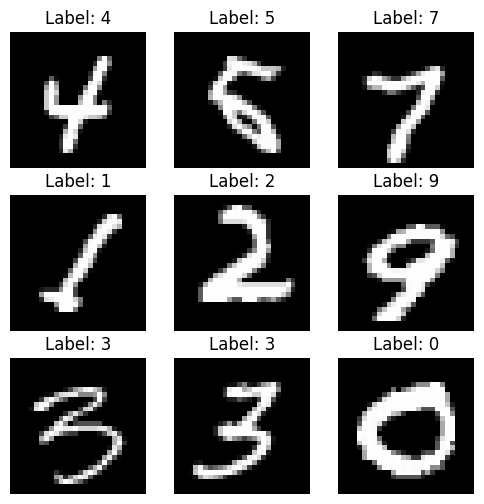

In [ ]:
def visualize_mnist_data(loader):
    data_iter = iter(loader)
    images, labels = next(data_iter)

    # Plot the images in a 3x3 grid
    plt.figure(figsize=(6, 6))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].squeeze(), cmap="gray")
        plt.title(f"Label: {labels[i].item()}")
        plt.axis("off")
    plt.show()

# Visualize images from the train_loader_mnist
visualize_mnist_data(train_loader_mnist)

### Step 1: Define the Model

We define a simple MLP model with:

	•	Input layer: Flattening the 28x28 pixel image into a single vector.
	•	Two hidden layers: Each with ReLU activation for non-linearity.
	•	Output layer: Produces scores for each of the 10 digit classes (0-9).

In [ ]:
class MLP_MNIST(nn.Module):
    def __init__(self):
        super(MLP_MNIST, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)

    def forward(self, x):
        x = # TODO: Flatten the input image.
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model_mnist = MLP_MNIST().to(device)
print(model_mnist)

MLP_MNIST(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


We define the loss function (CrossEntropyLoss) and optimizer (SGD). Using tqdm, we add a progress bar for the training loop.

### Step 2: Define the Loss Function and Optimizer

In [ ]:
# Define loss function and optimizer
criterion = # TODO: Define Cross Entropy Loss
optimizer = # TODO: Define SGD Optimizer

### Steps 3 and 4: Training and Testing Loops

In [ ]:
# Initialize lists to store loss values
train_losses = []
test_losses = []

# Training loop with loss recording
epochs = 5
for epoch in range(epochs):
    model_mnist.train()  # Set the model to training mode
    running_loss = 0.0

    for images, labels in tqdm(train_loader_mnist, desc=f"Epoch {epoch + 1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model_mnist(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate and store the average training loss for the epoch
    avg_train_loss = running_loss / len(train_loader_mnist)
    train_losses.append(avg_train_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}")

    # TODO: Write the testing loop of the model...

    # Calculate and store the average test loss for the epoch
    avg_test_loss = test_loss / len(test_loader_mnist)
    test_losses.append(avg_test_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Test Loss: {avg_test_loss:.4f}")

print("Training complete!")

Epoch 1/5: 100%|██████████| 938/938 [00:22<00:00, 41.72it/s]


Epoch [1/5], Training Loss: 0.3856
Epoch [1/5], Test Loss: 0.2899


Epoch 2/5: 100%|██████████| 938/938 [00:14<00:00, 62.60it/s]


Epoch [2/5], Training Loss: 0.2550
Epoch [2/5], Test Loss: 0.2118


Epoch 3/5: 100%|██████████| 938/938 [00:14<00:00, 63.84it/s]


Epoch [3/5], Training Loss: 0.2451
Epoch [3/5], Test Loss: 0.2256


Epoch 4/5: 100%|██████████| 938/938 [00:17<00:00, 54.54it/s]


Epoch [4/5], Training Loss: 0.2361
Epoch [4/5], Test Loss: 0.2084


Epoch 5/5: 100%|██████████| 938/938 [00:16<00:00, 58.42it/s]


Epoch [5/5], Training Loss: 0.2229
Epoch [5/5], Test Loss: 0.2422
Training complete!


### Step 5: Plot the training and testing losses

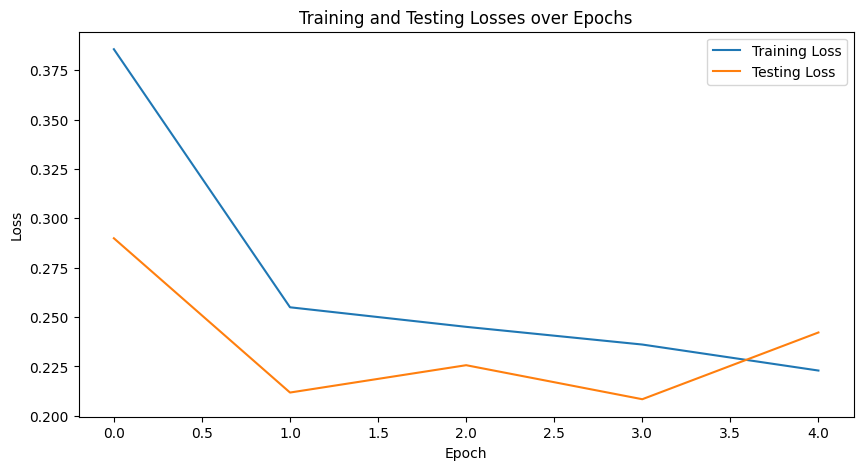

In [ ]:
# Plotting the training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title("Training and Testing Losses over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Object Classification (CIFAR-10 CNN)

The CIFAR-10 dataset contains 32x32 color images across 10 classes (e.g., airplanes, cars, birds). We’ll apply some basic data augmentations like horizontal flipping and random cropping.

In [ ]:
# Define transformations for CIFAR-10 data
transform_cifar10 = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Download and load CIFAR-10 dataset
train_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform_cifar10, download=True)
test_cifar10 = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform_cifar10, download=True)

train_loader_cifar10 = torch.utils.data.DataLoader(train_cifar10, batch_size=64, shuffle=True)
test_loader_cifar10 = torch.utils.data.DataLoader(test_cifar10, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


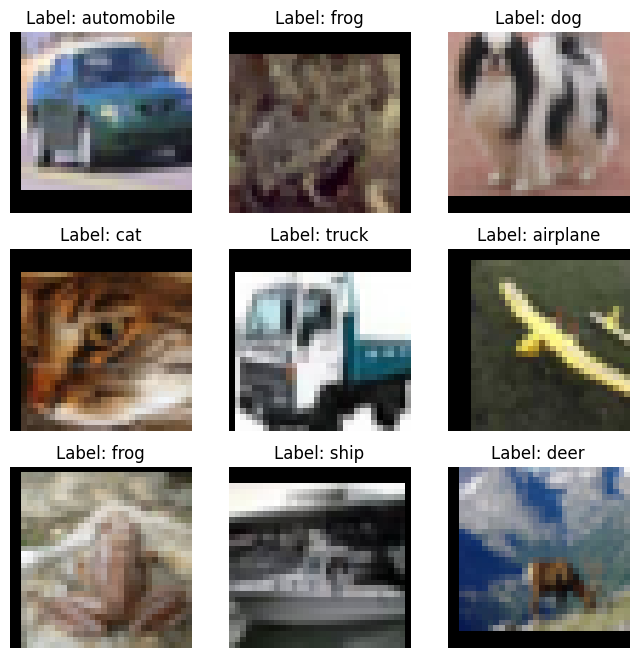

In [ ]:
def visualize_cifar10_data(loader, classes):
    data_iter = iter(loader)
    images, labels = next(data_iter)

    # Plot the images in a 3x3 grid
    plt.figure(figsize=(8, 8))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        img = images[i].numpy().transpose((1, 2, 0))  # Convert to HWC format for plotting
        img = img * 0.5 + 0.5  # Unnormalize to [0, 1] range
        plt.imshow(img)
        plt.title(f"Label: {classes[labels[i].item()]}")
        plt.axis("off")
    plt.show()

# CIFAR-10 classes
cifar10_classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer',
    'dog', 'frog', 'horse', 'ship', 'truck'
]

# Visualize images from the train_loader_cifar10
visualize_cifar10_data(train_loader_cifar10, cifar10_classes)

### Step 1: Define the CNN Model


A CNN is well-suited for image data due to its convolutional layers, which capture spatial hierarchies. Our model will include:

	•	Three convolutional layers with ReLU and max-pooling.
	•	Two fully connected layers for classification.

In [ ]:
# Define a simple CNN for CIFAR-10 classification
class CNN_CIFAR10(nn.Module):
    def __init__(self):
        # TODO: Define the CNN Model

    def forward(self, x):
        # TODO: Define the forward method for the CNN Model
        return x

model_cifar10 = CNN_CIFAR10().to(device)
print(model_cifar10)

CNN_CIFAR10(
  (conv1): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=2048, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
)


### Step 2: Define the Loss Function and Optimizer

We define the loss function and optimizer We use tqdm for progress visualization.

In [ ]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_cifar10.parameters(), lr=0.001)

### Step 3: Define Testing and Training Loops


  Now let's define our testing and training losses!
    
    •	Track the training loss for each epoch.
	•	Run the testing loop at the end of each epoch to calculate the test loss.
	•	Store both losses for plotting.

In [ ]:
# Initialize lists to store loss values
train_losses_cifar10 = []
test_losses_cifar10 = []

# Training loop with loss recording
epochs = 10
for epoch in range(epochs):
    model_cifar10.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader_cifar10, desc=f"Epoch {epoch + 1}/{epochs}"):
        images, labels = images.to(device), labels.to(device)

        outputs = model_cifar10(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader_cifar10)
    train_losses_cifar10.append(avg_train_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Training Loss: {avg_train_loss:.4f}")

    model_cifar10.eval()
    test_loss = 0.0

    with torch.no_grad():
        for images, labels in test_loader_cifar10:
            images, labels = images.to(device), labels.to(device)

            outputs = model_cifar10(images)
            loss = criterion(outputs, labels)

            test_loss += loss.item()

    avg_test_loss = test_loss / len(test_loader_cifar10)
    test_losses_cifar10.append(avg_test_loss)
    print(f"Epoch [{epoch + 1}/{epochs}], Test Loss: {avg_test_loss:.4f}")

print("Training complete for CIFAR-10!")

Epoch 1/10: 100%|██████████| 782/782 [00:25<00:00, 31.20it/s]


Epoch [1/10], Training Loss: 1.5562
Epoch [1/10], Test Loss: 1.3214


Epoch 2/10: 100%|██████████| 782/782 [00:25<00:00, 31.08it/s]


Epoch [2/10], Training Loss: 1.1758
Epoch [2/10], Test Loss: 1.0615


Epoch 3/10: 100%|██████████| 782/782 [00:25<00:00, 31.24it/s]


Epoch [3/10], Training Loss: 0.9921
Epoch [3/10], Test Loss: 0.9428


Epoch 4/10: 100%|██████████| 782/782 [00:25<00:00, 31.05it/s]


Epoch [4/10], Training Loss: 0.8823
Epoch [4/10], Test Loss: 0.8417


Epoch 5/10: 100%|██████████| 782/782 [00:24<00:00, 31.62it/s]


Epoch [5/10], Training Loss: 0.8068
Epoch [5/10], Test Loss: 0.8074


Epoch 6/10: 100%|██████████| 782/782 [00:25<00:00, 31.02it/s]


Epoch [6/10], Training Loss: 0.7578
Epoch [6/10], Test Loss: 0.7758


Epoch 7/10: 100%|██████████| 782/782 [00:25<00:00, 31.28it/s]


Epoch [7/10], Training Loss: 0.7076
Epoch [7/10], Test Loss: 0.7479


Epoch 8/10: 100%|██████████| 782/782 [00:25<00:00, 30.12it/s]


Epoch [8/10], Training Loss: 0.6717
Epoch [8/10], Test Loss: 0.7023


Epoch 9/10: 100%|██████████| 782/782 [00:25<00:00, 30.60it/s]


Epoch [9/10], Training Loss: 0.6423
Epoch [9/10], Test Loss: 0.7055


Epoch 10/10: 100%|██████████| 782/782 [00:26<00:00, 29.90it/s]


Epoch [10/10], Training Loss: 0.6232
Epoch [10/10], Test Loss: 0.6717
Training complete for CIFAR-10!


### Step 4: Plot the training and testing losses

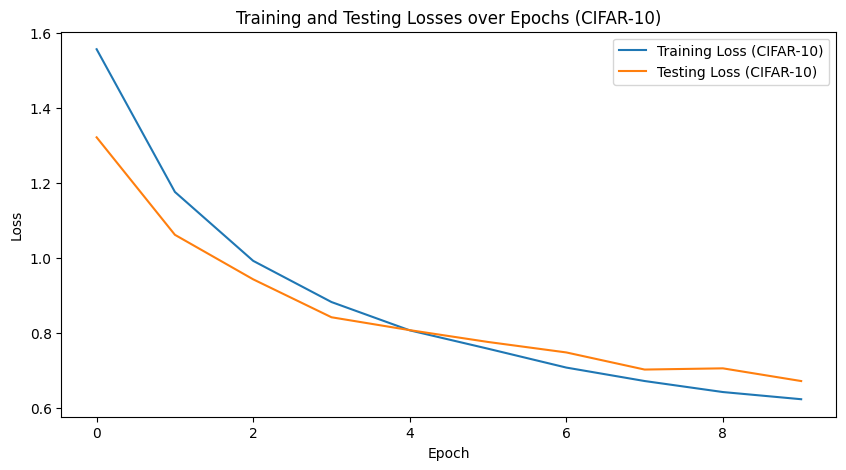

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses_cifar10, label='Training Loss (CIFAR-10)')
plt.plot(test_losses_cifar10, label='Testing Loss (CIFAR-10)')
plt.title("Training and Testing Losses over Epochs (CIFAR-10)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# Generative AI

**Generative AI** refers to a branch of artificial intelligence that focuses on creating new data instances that resemble existing data. Unlike traditional AI, which focuses on classification or regression tasks, generative models can produce entirely new content, including images, text, audio, and more.

Generative AI models learn the underlying patterns in data and use them to generate similar data. Some popular applications of generative AI include:
- **Image Synthesis**: Models like GANs (Generative Adversarial Networks) and diffusion models can generate realistic images from noise or textual descriptions.
- **Text Generation**: Language models like GPT-3 create coherent text based on a prompt.
- **Style Transfer**: Image-to-image translation models (e.g., CycleGAN) can transform an image from one style to another.

Training a Generative Model like a Stable Diffusion model or GAN would take too long for the sake of this demo, so we are going to look at a pretrained model! Using existing ML models in your apps is always a great idea! Why waste time reinventing the wheel, when you can focus on adapting it for your needs (i.e. Transfer Learning).

### Step 1: Write the prompt

In [ ]:
prompt = "lebron james and his son bronny playing basketball"

### Step 2: Load the model and supply the prompt

In [ ]:
# TODO: Load the pre-trained Stable Diffusion model and supply the given prompt.

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

### Step 3: Visualize the results

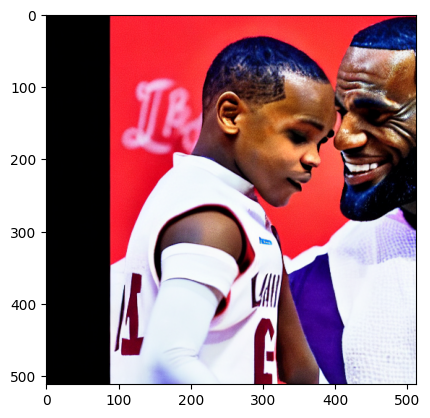

In [ ]:
# Display the image
plt.imshow(image)

# Conclusion

In this notebook, we explored key concepts in machine learning, covering **regression**, **classification**, and **generative AI**. Here’s a summary of what we learned:

1. **Regression**:
   - We introduced regression as a technique for predicting continuous values and explored it through two approaches:
     - **Least Squares Method**: A straightforward mathematical approach for linear regression, where we calculated optimal parameters directly without iterative training.
     - **Multilayer Perceptron (MLP) for Regression**: We used a simple neural network to learn a non-linear relationship in data, demonstrating the flexibility of MLPs for capturing complex patterns.
   - We visualized the training and testing losses for regression models, helping us understand model performance over time.

2. **Classification**:
   - We trained an **MLP** on the MNIST dataset to classify handwritten digits, providing insight into basic neural networks for classification tasks.
   - We then used a **Convolutional Neural Network (CNN)** on the CIFAR-10 dataset to classify images into ten categories. The CNN’s structure allowed it to capture spatial hierarchies in image data, which is crucial for accurate image recognition.
   - We plotted training and testing losses, observing the model’s performance and identifying signs of overfitting or underfitting.

3. **Generative AI**:
   - We introduced the concept of generative AI, which focuses on creating new data that resembles existing data. Applications of generative AI include text generation, image synthesis, and style transfer.
   - Using a pre-trained generative model, we generated images based on textual prompts, showcasing the power of generative AI without needing to train complex models from scratch.

### Key Takeaways
- **Regression models** are essential for predicting continuous values and can be implemented using methods ranging from simple least squares to more flexible neural networks.
- **Classification models** categorize data into specific labels, with CNNs being particularly effective for image-based tasks due to their ability to capture spatial features.
- **Generative AI models** are powerful tools for creating new data instances, supporting applications in image synthesis, language generation, and creative tasks.
- **Pre-trained models** make it easier to leverage advanced generative technologies without high computational demands, making state-of-the-art AI more accessible.

This notebook provided hands-on experience with building and evaluating various machine learning models, from regression and classification to generative tasks. These foundational skills serve as a strong base for more advanced AI applications, and we encourage further experimentation to deepen your understanding.